In [1]:
from flash_ansr import FlashANSR, GenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
MODEL = "psaegert/flash-ansr-v21.0-60M"

In [4]:
install_model(MODEL)

Installing model psaegert/flash-ansr-v21.0-60M to /home/psaegert/Projects/flash-ansr/models/psaegert/flash-ansr-v21.0-60M


Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

Model psaegert/flash-ansr-v21.0-60M installed successfully!


In [20]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    # generation_config=GenerationConfig(method='beam_search', beam_width=128 * 16, equivalence_pruning=True),
    generation_config=GenerationConfig(method='softmax_sampling', choices=1024 * 32 * 4, max_len=32),
    # generation_config=GenerationConfig(method='mcts', beam_width=1024, simulations=1024 * 32, temperature=1),
    parsimony=0.02
).to(device)

In [6]:
widget = ScatterWidget()
widget

ScatterWidget()

In [8]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [21]:
nsr.fit(X, y, verbose=True)

Generating tokens:   0%|          | 0/31 [00:00<?, ?it/s]

Fitting Constants: 100%|██████████| 56401/56401 [01:42<00:00, 550.38it/s]


In [22]:
nsr.compile_results(parsimony=0.02)

In [23]:
nsr.get_expression(0)

'-1.03 - (x1 + 15.39 * sin(-0.34 * x1 + atan(-4.57 + x1) - 5.35))'

In [24]:
nsr.results

,log_prob,fvu,score,expression,complexity,target_complexity,numeric_prediction,raw_beam,beam,raw_beam_decoded,function,refiner,beam_id,fit_constants,fit_covariances,fit_loss
0,-21.921074,1.996425e-02,-1.359747,"[-, <constant>, +, x1, *, <constant>, sin, -, ...",17,None,None,"[1, 16, 6, 15, 47, 17, 6, 31, 16, 15, 17, 6, 4...","[16, 6, 15, 47, 17, 6, 31, 16, 15, 17, 6, 47, ...","[-, <constant>, +, x1, *, <constant>, sin, -, ...",<function <lambda> at 0x7841f63c7380>,"Refiner(expression=['-', '<constant>', '+', 'x...",0,"[-1.0311735573291503, 15.390072364212493, -0.3...","[[0.03511885170975463, 0.01769057653234562, 0....",7.284057e-01
1,-20.753508,3.190324e-02,-1.156165,"[+, <constant>, *, <constant>, sin, /, -, *, <...",17,None,None,"[1, 15, 6, 17, 6, 31, 18, 16, 17, 6, 47, 6, 16...","[15, 6, 17, 6, 31, 18, 16, 17, 6, 47, 6, 16, 6...","[+, <constant>, *, <constant>, sin, /, -, *, <...",<function <lambda> at 0x7841f6e69e40>,"Refiner(expression=['+', '<constant>', '*', '<...",1,"[1.231033971135687, -10.620861467347744, -0.71...","[[0.03655192651243764, -0.002504925825122654, ...",1.164006e+00
2,-20.796520,4.137269e-02,-1.083286,"[+, <constant>, *, <constant>, *, atan, -, <co...",15,None,None,"[1, 15, 6, 17, 6, 17, 36, 16, 6, 47, 31, 15, 6...","[15, 6, 17, 6, 17, 36, 16, 6, 47, 31, 15, 6, 1...","[+, <constant>, *, <constant>, *, atan, -, <co...",<function <lambda> at 0x7841f6eaefc0>,"Refiner(expression=['+', '<constant>', '*', '<...",2,"[3.3077953256057038, 8.736248236799847, 4.4934...","[[0.0957597413482115, 0.04212866827741968, -0....",1.509503e+00
3,-17.226192,4.137269e-02,-1.083286,"[-, *, <constant>, *, atan, -, <constant>, x1,...",15,None,None,"[1, 16, 17, 6, 17, 36, 16, 6, 47, 32, 15, 6, 1...","[16, 17, 6, 17, 36, 16, 6, 47, 32, 15, 6, 17, ...","[-, *, <constant>, *, atan, -, <constant>, x1,...",<function <lambda> at 0x7841fdc3aac0>,"Refiner(expression=['-', '*', '<constant>', '*...",3,"[-8.736245421751136, 4.49349008027095, -1.6537...","[[0.050684175439087396, 0.006125252776937142, ...",1.509503e+00
4,-15.710159,4.137269e-02,-1.083286,"[+, <constant>, *, <constant>, *, atan, -, <co...",15,None,None,"[1, 15, 6, 17, 6, 17, 36, 16, 6, 47, 32, 16, 6...","[15, 6, 17, 6, 17, 36, 16, 6, 47, 32, 16, 6, 1...","[+, <constant>, *, <constant>, *, atan, -, <co...",<function <lambda> at 0x7841ff3f5940>,"Refiner(expression=['+', '<constant>', '*', '<...",4,"[3.3077964711917986, -8.736248687017802, 4.493...","[[0.0957598343670289, -0.042128738260142094, -...",1.509503e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50943,-16.882908,7.080848e+67,68.070085,"[+, <constant>, +, x1, /, <constant>, sin, exp...",11,None,None,"[1, 15, 6, 15, 47, 18, 6, 31, 37, 18, 47, 6, 2]","[15, 6, 15, 47, 18, 6, 31, 37, 18, 47, 6]","[+, <constant>, +, x1, /, <constant>, sin, exp...",<function <lambda> at 0x7841fe19dd00>,"Refiner(expression=['+', '<constant>', '+', 'x...",50943,"[2.2782855232735246e+30, -3.6545732579426304e-...","[[2.922478404623396e+67, -2.307454514295336e+2...",2.583483e+69
50944,-28.460167,3.238987e+68,68.850409,"[*, <constant>, -, exp, /, -, pow2, x1, x1, <c...",17,None,None,"[1, 17, 6, 16, 37, 18, 16, 23, 47, 47, 6, 17, ...","[17, 6, 16, 37, 18, 16, 23, 47, 47, 6, 17, 6, ...","[*, <constant>, -, exp, /, -, pow2, x1, x1, <c...",<function <lambda> at 0x7841f448fec0>,"Refiner(expression=['*', '<constant>', '-', 'e...",50944,"[2.4328468929032786e-15, 0.945026114161393, -2...","[[4.954576788171599e-27, 1.0723735053530023e-2...",1.181760e+70
50945,-17.591393,4.780397e+73,73.899464,"[*, <constant>, -, exp, /, x1, <constant>, *, ...",11,None,None,"[1, 17, 6, 16, 37, 18, 47, 6, 17, 6, 32, 47, 2]","[17, 6, 16, 37, 18, 47, 6, 17, 6, 32, 47]","[*, <constant>, -, exp, /, x1, <constant>, *, ...",<function <lambda> at 0x7841fd867100>,"Refiner(expression=['*', '<constant>', '-', 'e...",50945,"[-2.7003923353830236e-19, 0.0761074771651817, ...","[[5.423129867483788e-34, -6.426970280728136e-2...",1.744152e+75
50946,-23.492357,3.313324e

In [25]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [26]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:130: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:173: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:522: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:161: RuntimeWarning: invalid value encountered in power
  return x ** 0.25
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:118: RuntimeWarning: invalid value encountered in sqrt
  return x ** 0.5
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:330: R

In [27]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

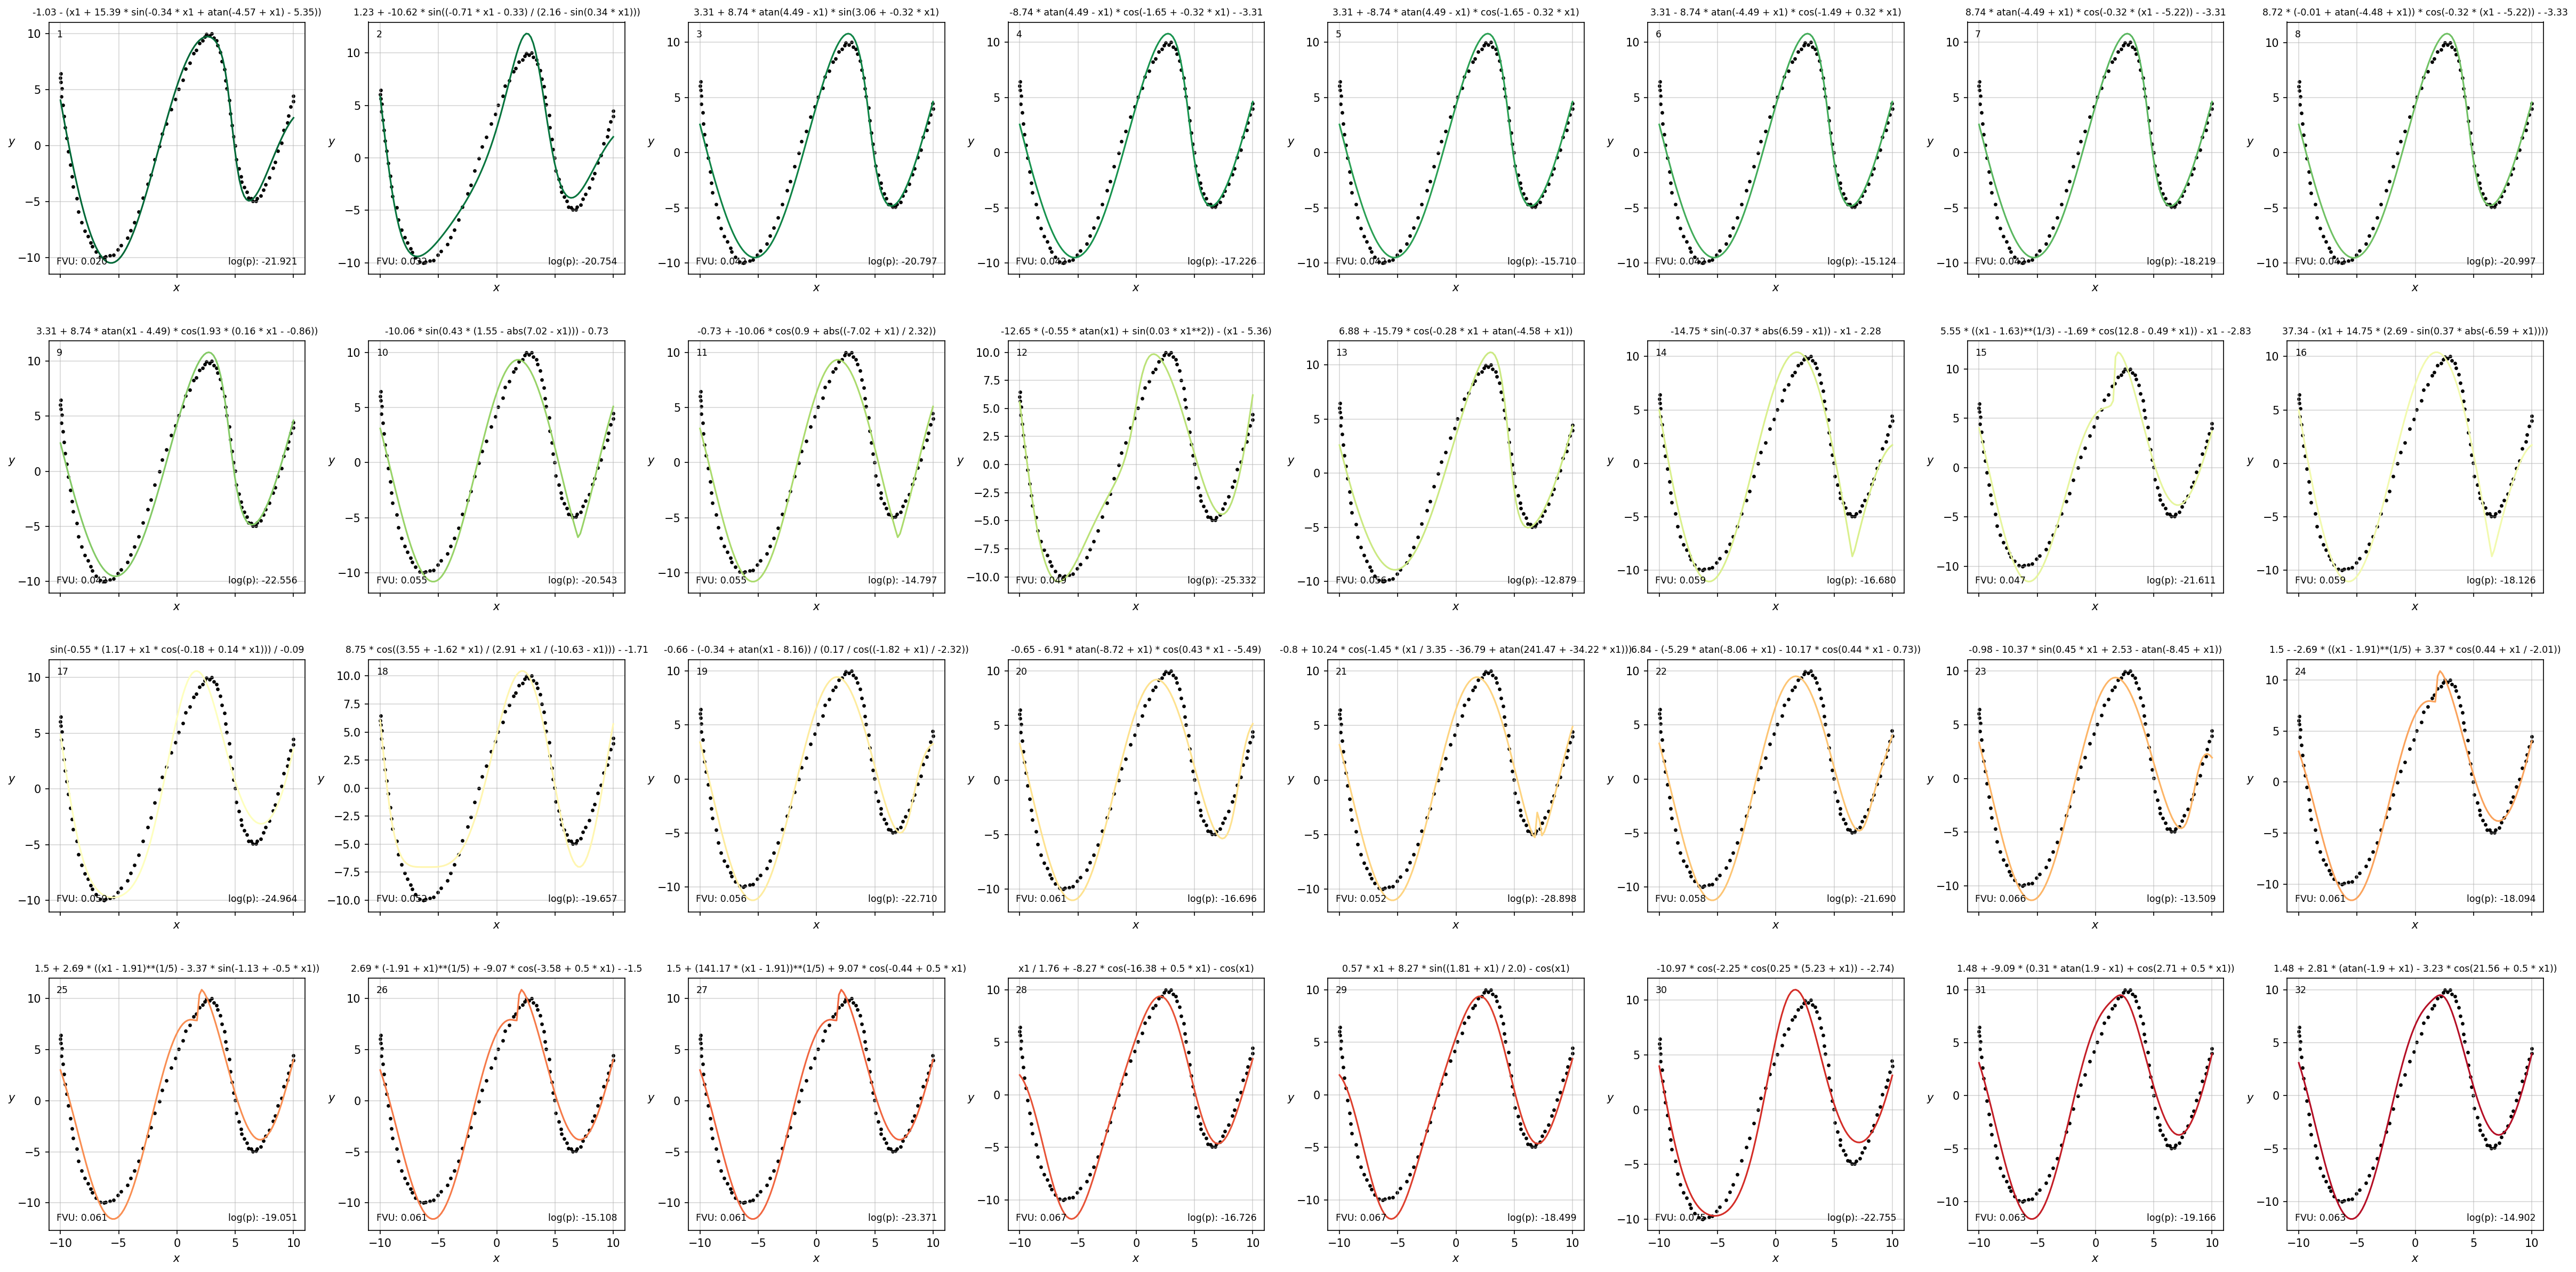

In [28]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)

Text(0, 0.5, 'Log Probability')

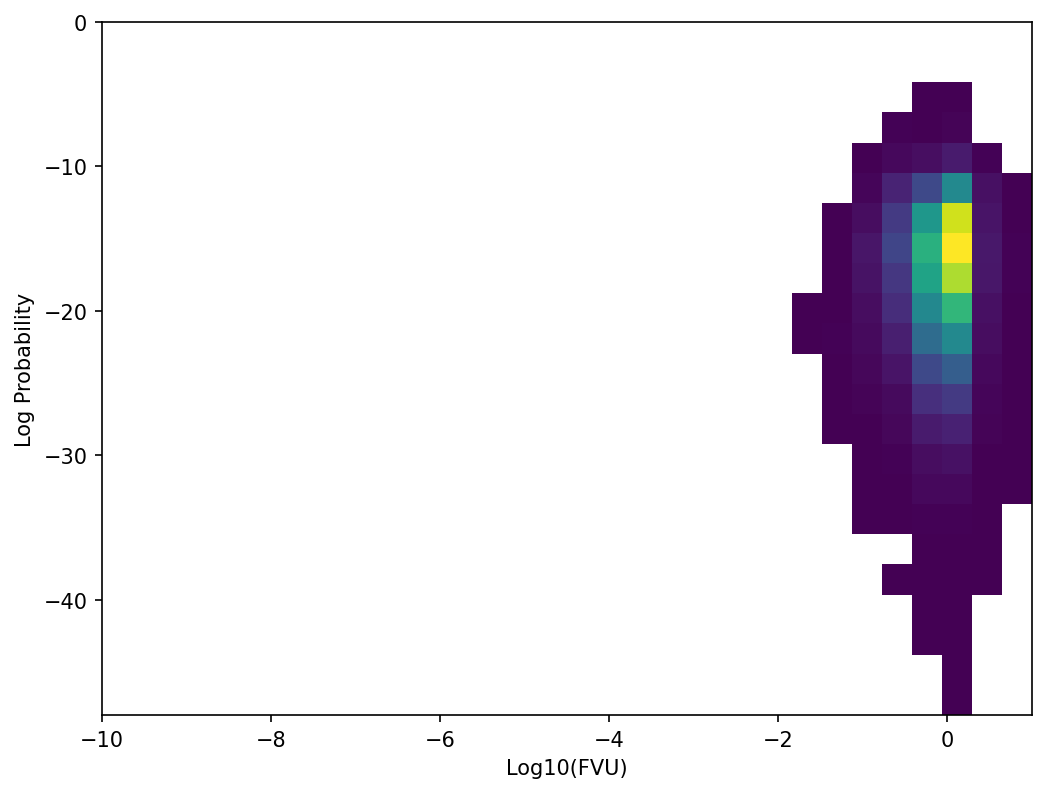

In [29]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-10, 1, 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Log Probability')

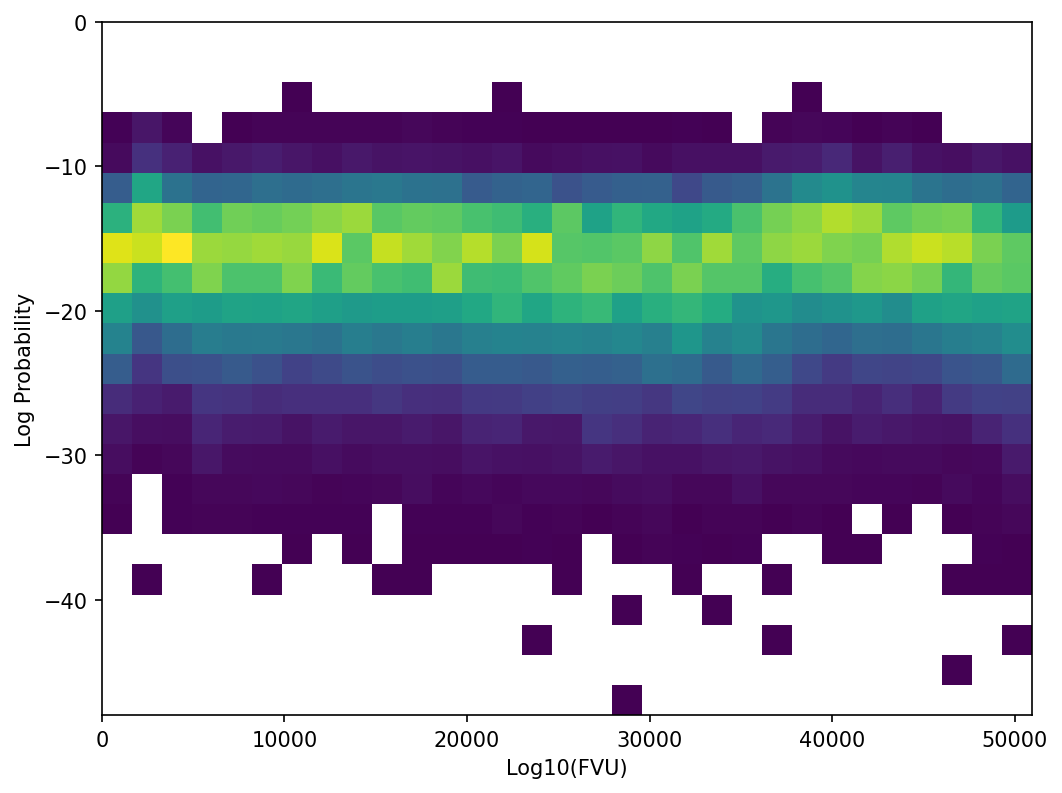

In [30]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.argsort(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-1, len(nsr.results), 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Complexity')

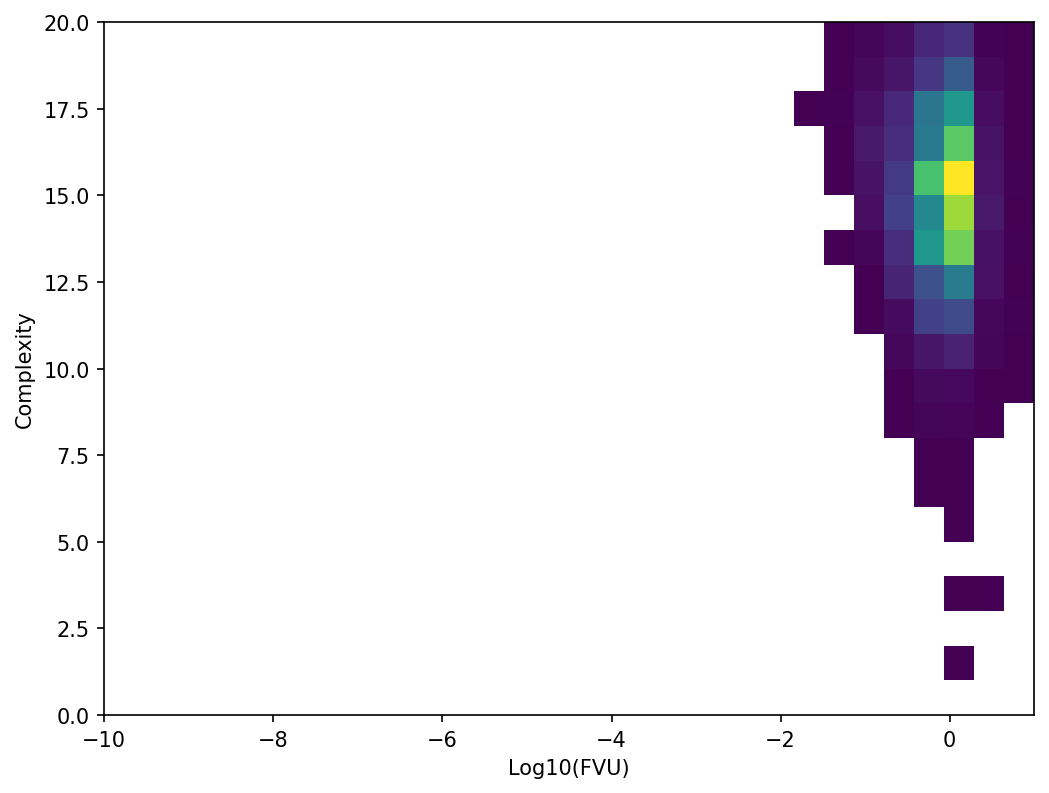

In [31]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['complexity'], bins=(np.linspace(-10, 1, 32), np.linspace(0, 20, 21)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Complexity')